# Regresion Logistica

# Cargar y analizar el dataset

In [2]:
# Importamos las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargamos el dataset
df = pd.read_csv('heart_cleveland_upload.csv')

# Vistazo inicial a los datos
print(df.head())
print(df.info())

# Estadísticas descriptivas
print(df.describe())

# Verificamos valores faltantes
print(df.isnull().sum())




   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       29

# Preprocesamiento de los datos


In [3]:
# Verificamos si hay valores faltantes
print(df.isnull().sum())

# En este caso, podemos eliminar filas o columnas con muchos valores nulos, o imputar los valores faltantes
# Supongamos que decidimos eliminar filas con valores nulos (ajustar según análisis):
df.dropna(inplace=True)

# Verificamos que no haya valores nulos
print(df.isnull().sum())

# Normalización o escalado de variables numéricas si es necesario (por ejemplo, edad, presión arterial, colesterol, etc.)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Escalamos las características numéricas seleccionadas
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Visualizamos los datos preprocesados
print(df.head())


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64
        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  1.600302    1   0  1.596266 -0.257179    1        2 -0.812095      0   
1  1.600302    0   0  0.468418 -0.160859    0        0  0.061157      0   
2  1.268242    0   0  1.032342 -0.411292    0        0 -1.554358      0   
3  1.157555    1   0  0.355633  0.667499    1        2  1.065396      0   
4  1.046868    1   0 -1.223355 -0.700254    0        2 -0.244481      1   

    oldpeak  slope  ca  thal  condition  
0 -0.820813      1   1     0          0  
1  0.639470      0 

# Selección de características

In [6]:
from sklearn.feature_selection import SelectKBest, f_classif

# Separación de la variable objetivo y las características
X = df.drop(columns=['condition'])
y = df['condition']

# Selección de características utilizando f_classif en lugar de chi2
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

# Visualizamos las características seleccionadas
print(X.columns[selector.get_support()])


Index(['age', 'sex', 'cp', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope',
       'ca', 'thal'],
      dtype='object')


# División del dataset en entrenamiento y prueba

In [7]:
from sklearn.model_selection import train_test_split

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

# Verificamos las dimensiones
print(f'Train shape: {X_train.shape}, Test shape: {X_test.shape}')


Train shape: (207, 10), Test shape: (90, 10)


# Entrenamiento del modelo de regresión logística

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Definimos el modelo
logreg = LogisticRegression()

# Configuramos los hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300]
}

# Buscamos los mejores hiperparámetros
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Mostramos los mejores parámetros
print(f"Mejores hiperparámetros: {grid_search.best_params_}")


Mejores hiperparámetros: {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}


# Evaluación del modelo

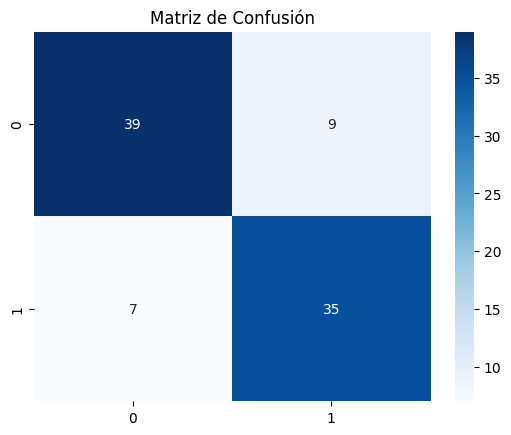

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        48
           1       0.80      0.83      0.81        42

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.82      0.82      0.82        90



In [9]:
from sklearn.metrics import classification_report, confusion_matrix

# Predicciones
y_pred = grid_search.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred))


# Visualizacion de los resultados

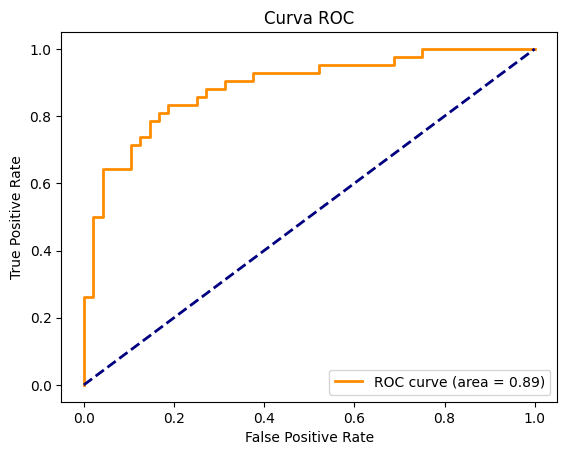

In [10]:
# Curva ROC
from sklearn.metrics import roc_curve, auc

y_pred_proba = grid_search.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
